<h2><b> Plot secao vertical de temperatura <h2> </b>
<p style="font-size:12px"> Fonte dos dados: MERCATOR OCEAN.</p>

<p> 
    
Nessa aula vamos observar a estrutura termica vertical do oceano Atlantico Sul usando dados do modelo global MERCATOR Ocean. Faremos um corte zonal em aproximadamente 8° e então plotaremos os dados!
    
</p>

<ul>
<p> Tópicos de hoje</p>
<li> Como abrir um arquivo netcdf4 </li>
<li> Como manipular dados multidimensionais</li>
<li> Como plotar uma seção vertical</li>

<ul>
    


Vamos importar as libs

<p style= "color:red"> Se você estiver no google colab, por favor descomente e rode as linhas abaixo, depois reinicie seu colab.</p>

In [ ]:
#!pip install netcdf4

In [ ]:
#pip install cmocean

In [1]:
import cmocean
import numpy as np 
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

#### defininção de funções

In [2]:
def lon360to180(lon):
    """
    Converts longitude values in the range [0,360]
    to longitude values in the range [-180,+180].
    """
    lon = np.asanyarray(lon)
    return ((lon + 180.) % 360.) - 180.

In [3]:
def hours2dates(reference_date, values):
    """"
    Converts hours values in datetime based in a
    specific date.  The reference date must be in the
    format Day/Month/Year Hour:Minutes.
    """
    import datetime as dt
    date_python = dt.datetime.strptime(reference_date,
                                  '%d/%m/%Y %H:%M')
    Time = [date_python + dt.timedelta(hours = x) for x in values]
    return Time

#### Lendo os dados do arquivo NetCDF

In [4]:
file = '/home/gustavo/Documentos/python_aulas/dados/DadosMercator/dadosMercator.nc'
dado = Dataset(file)

In [5]:
dado.variables

{'depth': <class 'netCDF4._netCDF4.Variable'>
 float32 depth(depth)
     valid_min: 0.494025
     valid_max: 1684.284
     units: m
     positive: down
     unit_long: Meters
     long_name: Depth
     standard_name: depth
     axis: Z
     _ChunkSizes: 50
     _CoordinateAxisType: Height
     _CoordinateZisPositive: down
 unlimited dimensions: 
 current shape = (39,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     valid_min: -66.0
     valid_max: 1.0
     step: 0.08333588
     units: degrees_north
     unit_long: Degrees North
     long_name: Latitude
     standard_name: latitude
     axis: Y
     _ChunkSizes: 2041
     _CoordinateAxisType: Lat
 unlimited dimensions: 
 current shape = (805,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'vo': <class 'netCDF4._netCDF4.Variable'>
 int16 vo(time, depth, latitude, longitude)
     long_name: Northward velocity
     standard_na

Dentro do arquivo temos as lats, lons e temperatura potencial

In [6]:
lat = dado['latitude'][:]
lon = lon360to180(dado['longitude'][:])
time = dado['time'][:]

A partir da latitude e longitude iremos encontrar o ponto que mais se aproxima da região de interesse, que no caso é por volta de 4ºS. Para isso, utilizaremos essa função que vamos definir em seguida.

In [7]:
def neighbor(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [8]:
neighbor_lat = neighbor(lat,-8) # Encontrando o valor mais proximo a 4º
# lim_lat = np.where(lat[lat<-34])

Agora podemos salvar nossas variaveis já utilizando a indexação a partindo do valor de latitude encontrado com a função "near".

In [9]:
temperatura = dado['thetao'][:,:,neighbor_lat,:].squeeze()
prof = dado['depth'][:]
lat = lat[lat==neighbor_lat]

Vamos fazer um teste para saber se estamos no cmainho certo.

In [10]:
X,Y = np.meshgrid(lat,lon)

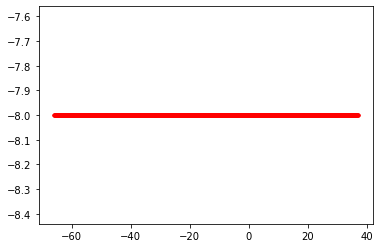

In [11]:
plt.plot(Y,X,'r.')

Tudo indica que conseguimos selecionar a linha proxima a banda de -8º de latitude. Podemos continuar.

Aqui escolhemos se vamos criar o grid a partir da longitude ou da distancia calculada.

In [12]:
X,Z = np.meshgrid(lon,-prof)

In [13]:
temperatura.shape #matriz de temperatura 3 tempos, 39 prof e 1237 longitudes

(3, 39, 1237)

In [13]:
X.shape, Z.shape #matriz lon e prof com 39 x 1237

((39, 1237), (39, 1237))

#### plot do dado em um loop

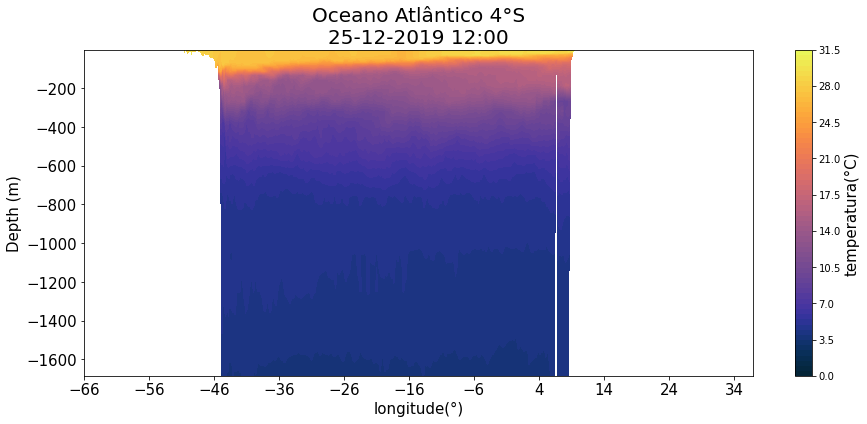

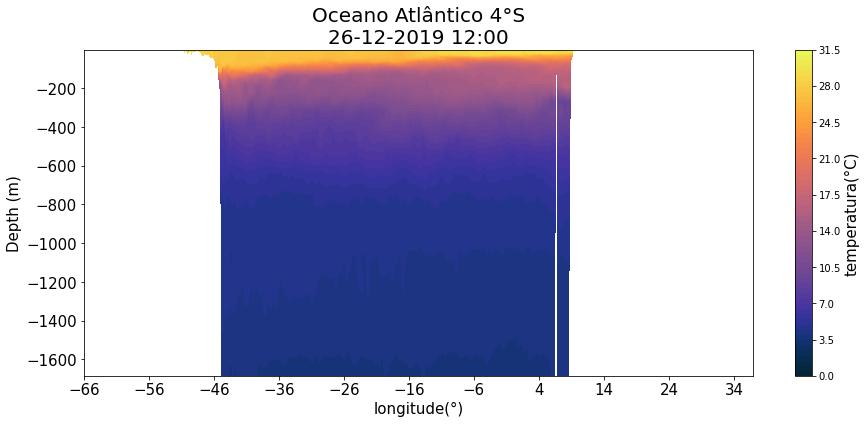

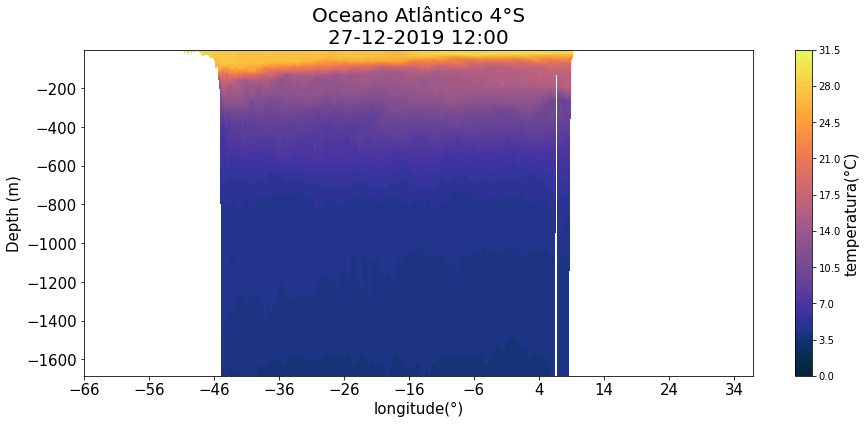

In [14]:
tempo = hours2dates('01/01/1950 00:00',time)


for ii in range(len(time)):
    
    date_str = tempo[ii].strftime('%d-%m-%Y %H:%M')
    colorScale = np.arange(0,32,.5)
    fig, ax = plt.subplots(1,figsize=(15,6));
    cmap = ax.contourf(X,Z,temperatura[ii,:,:],levels=colorScale,
                       cmap = cmocean.cm.thermal);
    cbar = plt.colorbar(cmap);
    cbar.set_label('temperatura(°C)',fontsize=15);
    plt.xticks(np.arange(min(lon), max(lon),10))
    ax.tick_params(axis='both', which='major', labelsize=15);
    ax.set_ylabel('Depth (m)',fontsize=15);
    ax.set_xlabel('longitude(°)',fontsize=15);
    ax.set_title('Oceano Atlântico 4°S\n'+date_str,fontsize=20);
